In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
df= pd.read_csv('../data/processed/merged_dataset_pivoted.csv')
df.head()

,time,host,total_events,is_malicious,event_1,event_3,event_8,event_10,event_11,event_12,...,event_4658,event_4661,event_4663,event_4672,event_4698,event_4768,event_5140,event_5145,event_5156,event_5158
0,3,Comp581624,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,Comp581624,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,Comp581624,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,Comp581624,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,Comp581624,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
columns = list(df.columns)
features = columns[4:]
df[features] = df[features].div(df.total_events, axis = 0)
# Separating out the features
X = df.loc[:, features].values
y = df.loc[:, ['is_malicious']].values
print(X)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [4]:
X = StandardScaler().fit_transform(X)

In [5]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(X)
pca_df = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])

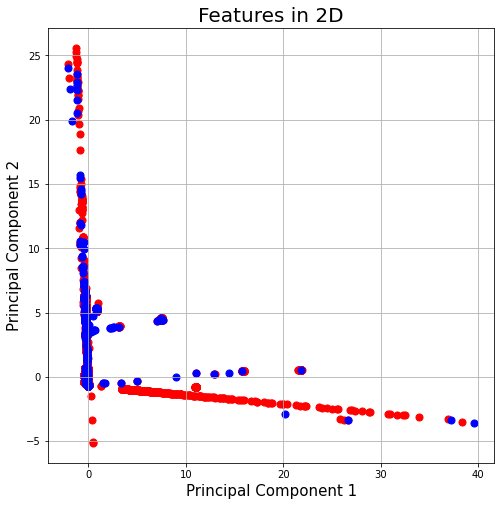

In [6]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Features in 2D', fontsize = 20)

targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['is_malicious'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'pc1']
               , pca_df.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
    
# ax.legend(targets)
# ax.scatter(pca_df['pc1']
#                , pca_df['pc2']
#                , s = 50)
ax.grid()

In [7]:
smote = SMOTE(random_state=0, sampling_strategy="minority")
X_os, y_os = smote.fit_resample(X, y)
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size = 0.2, random_state=2)

In [8]:
# Decision Tree Classifier

# Create Decision Tree classifer object
clf_os = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_os.fit(X_train_os, y_train_os)

# Predict the response for the test dataset
y_pred_os = clf_os.predict(X_test_os)

# Check Prediction
print(classification_report(y_test_os, y_pred_os))
# print(confusion_matrix(y_test_os, y_pred_os))
print("Accuracy:", accuracy_score(y_test_os, y_pred_os))
print("Label 0:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 0))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 0))
print("Label 1:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 1))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12930
           1       0.99      0.98      0.99     12767

    accuracy                           0.99     25697
   macro avg       0.99      0.99      0.99     25697
weighted avg       0.99      0.99      0.99     25697

Accuracy: 0.9877806747869401
Label 0:
Precision: 0.9847832769750999
Recall: 0.9910286156225832
Label 1:
Precision: 0.9908553409538825
Recall: 0.9844912665465654


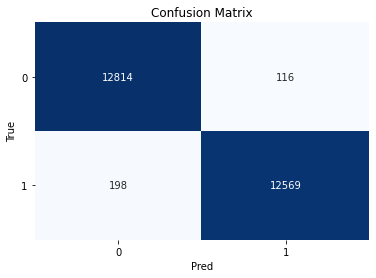

In [9]:
classes = np.unique(y_pred_os)
fig,ax = plt.subplots()
cm = metrics.confusion_matrix(y_test_os,y_pred_os,labels=classes)
sns.heatmap(cm, annot=True,fmt='d',cmap=plt.cm.Blues,cbar=False)
ax.set(xlabel="Pred",ylabel="True",title="Confusion Matrix")
ax.set_yticklabels(labels=classes,rotation=0)
plt.show()

In [10]:
# K Neighbors Classifier

# Create K Neighbors Classifier Object
neigh = KNeighborsClassifier(n_neighbors=3)

# Train K Neighbors Classifier Object
neigh.fit(X_train_os,y_train_os.ravel())

# Predict the response for test dataset
y_pred_os = neigh.predict(X_test_os)

# Check Prediction
print(classification_report(y_test_os, y_pred_os))
# print(confusion_matrix(y_test_os, y_pred_os))
print("Accuracy:", accuracy_score(y_test_os, y_pred_os))
print("Label 0:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 0))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 0))
print("Label 1:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 1))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12930
           1       0.99      0.98      0.99     12767

    accuracy                           0.99     25697
   macro avg       0.99      0.99      0.99     25697
weighted avg       0.99      0.99      0.99     25697

Accuracy: 0.9863408179943184
Label 0:
Precision: 0.9836960701376606
Recall: 0.9892498066511988
Label 1:
Precision: 0.9890499448558374
Recall: 0.9833946894336962


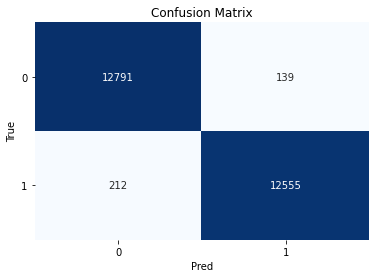

In [11]:
classes = np.unique(y_pred_os)
fig,ax = plt.subplots()
cm = metrics.confusion_matrix(y_test_os,y_pred_os,labels=classes)
sns.heatmap(cm, annot=True,fmt='d',cmap=plt.cm.Blues,cbar=False)
ax.set(xlabel="Pred",ylabel="True",title="Confusion Matrix")
ax.set_yticklabels(labels=classes,rotation=0)
plt.show()

In [12]:
# Logistic Regression

# instantiate model
model = LogisticRegression()

# fit 
model.fit(X_train_os,y_train_os)

# predict
y_pred_os = model.predict(X_test_os)

# Check Prediction
print(classification_report(y_test_os, y_pred_os))
# print(confusion_matrix(y_test_os, y_pred_os))
print("Accuracy:", accuracy_score(y_test_os, y_pred_os))
print("Label 0:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 0))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 0))
print("Label 1:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 1))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 1))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     12930
           1       0.90      0.90      0.90     12767

    accuracy                           0.90     25697
   macro avg       0.90      0.90      0.90     25697
weighted avg       0.90      0.90      0.90     25697

Accuracy: 0.9002996458730591
Label 0:
Precision: 0.9038641321283889
Recall: 0.897293116782676
Label 1:
Precision: 0.8967420884845657
Recall: 0.9033445601942508


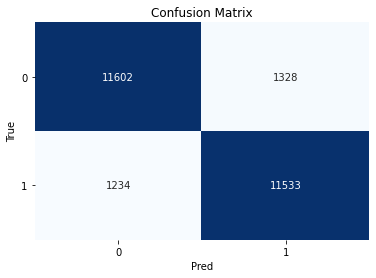

In [13]:
classes = np.unique(y_pred_os)
fig,ax = plt.subplots()
cm = metrics.confusion_matrix(y_test_os,y_pred_os,labels=classes)
sns.heatmap(cm, annot=True,fmt='d',cmap=plt.cm.Blues,cbar=False)
ax.set(xlabel="Pred",ylabel="True",title="Confusion Matrix")
ax.set_yticklabels(labels=classes,rotation=0)
plt.show()

In [14]:
print(classes)

[0 1]
